<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/notebooks/machine_learning/03_Optimization/04_Stochastic_Gradient_Ascent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4: Stochastic Gradient Ascent
***

![](https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/machine_learning/03_Optimization/figs/mountains.jpg)

**Note**: There are several large **Helper Functions** at the bottom of the notebook.  Scroll down and execute those cells before you continue. 

<br>
<br>



### The Learning Rate Schedule Game
***

In the case when your log-likelihood function is convex, the choice of learning rate mainly affects the convergence of your SGA routine.  In a nonconvex problem, the choice of learning rate can determine whether you find the global maximum, or get stuck forever in a local maximum.  In most sophisticated optimization routines, the learning rate is adapted over time.  Varying learning rate schedules allow you to explore local maximums but still be able to make it out and eventually find the global maximum.  

The following game is a cheap facsimile of stochastic gradient ascent.  There is no log-likelihood function, or training set.  You just have a simple function that you would like to maximize, namely 

$$
f(x,y) = \sin(3 \pi x) ~ \sin(3 \pi y) + 3~\textrm{exp}\left[{-\left(x-\frac{1}{2}\right)^2 - \left(y-\frac{1}{2}\right)^2}\right]
$$

The surface looks as follows.  Notice that there is a global maximum at $(1/2,1/2)$ and several local maxima and minima surrounding it. 


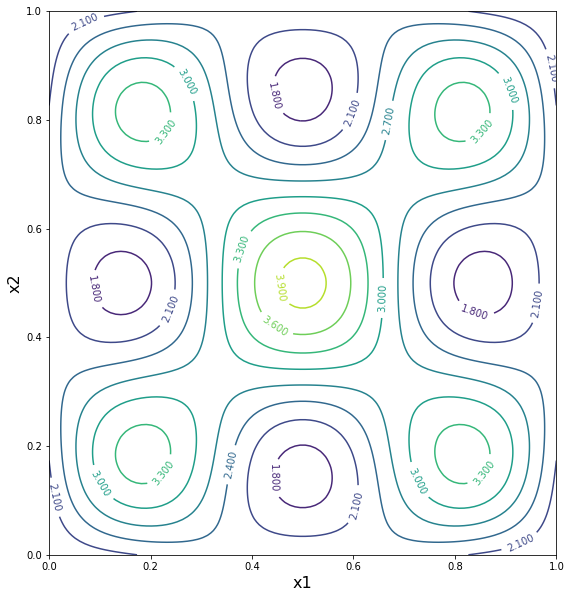

In [2]:
plotsurface()

I've given you a starting point and a basic gradient ascent algorithm (located in the Helper Functions section below).  Below this text there is a learning rate scheduling function that currently just returns the initial learning rate that you prescribe.  The goal of this game is for you to adjust the initial learning rate and the scheduling function that allows the iterate to make it to the global maximum.  The **only** things you're allowed to change are the **initial learning rate** and the **schedule function**.   Before you can play you need to evaluate the code-blocks at the bottom of the page.  Then come back and evaluate the $\texttt{playgame}$ function with it's current inputs and see what happens! 

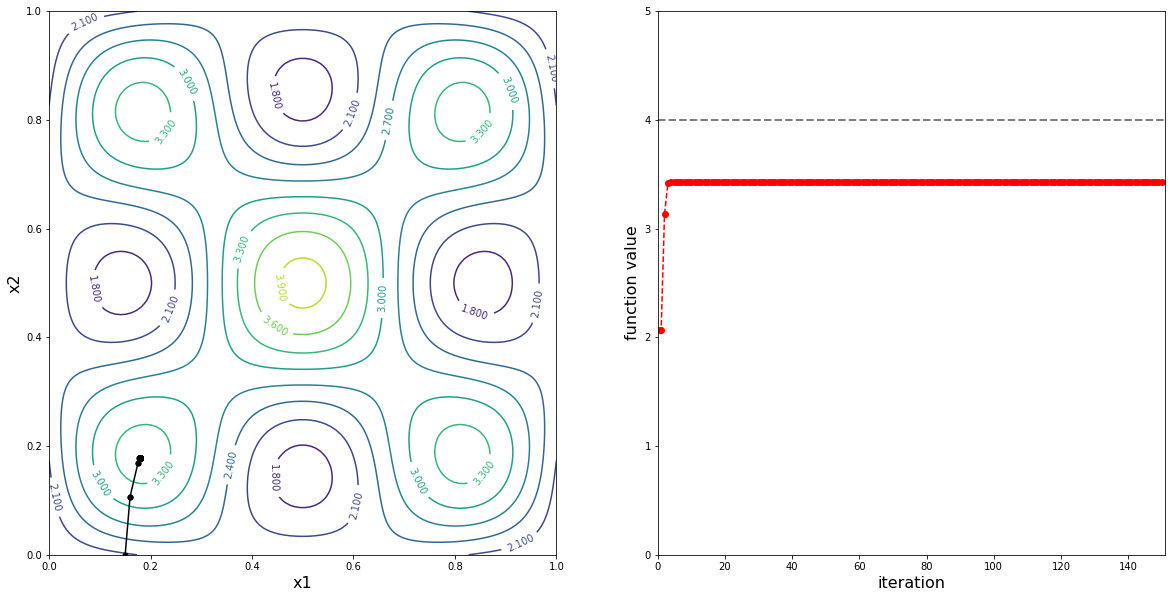

In [3]:
def schedule(k, n, eta0):
    '''
    :param k: The current iteration 
    :param n: The max number of iterations
    :param eta0: The original learning rate 
    '''
    return eta0 

playgame(np.array([0.15,0.0]), 150, .01)


***
**Hint**: If you're not having much luck, try implementing a schedule of the form 
$
\eta_k = \dfrac{\eta_0}{ 1 + \alpha ~ k~/~n}
$ where here $\alpha$ is a tuning parameter.  You'll probably also have to make your initial learning rate bigger. 
***

<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br><br>
### Helper Functions
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def myfun(x, y): 
    return np.sin(3*np.pi*x)*np.sin(3*np.pi*y) + 3*np.exp(-(x-.5)**2 - (y-.5)**2)

def mygrad(x):
    g1 = 3 * np.pi * np.cos(3*np.pi*x[0]) * np.sin(3*np.pi*x[1]) - 4 * (x[0]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    g2 = 3 * np.pi * np.sin(3*np.pi*x[0]) * np.cos(3*np.pi*x[1]) - 4 * (x[1]-.5) * np.exp(-(x[0]-.5)**2 - (x[1]-.5)**2)
    return np.array([g1, g2])

def SGA(x, numstep, eta0):
    '''
    :param x: Starting point 
    :param numstep: Total number iterations 
    :param eta0: Initial learning rate 
    '''
    xhist = np.zeros((numstep+1,2))
    xhist[0,:] = x 
    for kk in range(numstep):
        x = x + schedule(kk, numstep, eta0) * mygrad(x)
        xhist[kk+1,:] = x 
    return xhist

def playgame(x0, numstep, eta0):
    '''
    :param x0: The starting point 
    :param numstep: The total number of iterations to do 
    :param eta0: The original learning rate 
    '''
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])

    xhist = SGA(x0, numstep, eta0)
    
    fvals = np.zeros(numstep+1)
    fvals[0] = myfun(x0[0], x0[1])

    for ii in range(xhist.shape[0]-1):
        x0 = xhist[ii][0]
        y0 = xhist[ii][1]
        x1 = xhist[ii+1][0]
        y1 = xhist[ii+1][1]
        ax1.plot([x0, x1], [y0,y1], color="black", marker="o", lw=1.5, markersize=5)
        fvals[ii+1] = myfun(x0, y0)
        
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)
        
    maxval = myfun(0.5,0.5)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(fvals, 'r--', marker="o")
    ax2.plot([0, numstep+1], [maxval, maxval], 'k--', lw=2, alpha=0.5)
    plt.xlim([0,numstep+1])
    plt.ylim([0,1.25*maxval])
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("function value", fontsize=16);
    
def plotsurface():
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 200))
    Z = myfun(xx, yy)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    CS = plt.contour(xx, yy, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("x1", fontsize=16)
    plt.ylabel("x2", fontsize=16)
    
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")